In [32]:
import pandas as pd
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import GRU
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates



In [46]:
square_stock = pd.read_csv('N:/Stock Prediction project/DSE3/ACI.csv')
square_stock


,Date,Open,Highest_Price,Lowest_Price,Close_Price,Volume
0,1999-01-02,31.0,31.5,30.6,30.6,9400
1,1999-01-03,30.5,30.6,30.4,30.5,14850
2,1999-01-04,30.4,30.6,30.2,30.2,10500
3,1999-01-05,30.2,30.2,30.0,30.1,10200
4,1999-01-06,30.2,30.2,28.0,28.5,45500
5,1999-01-07,28.0,28.0,27.0,27.7,53400
6,1999-01-09,26.2,26.7,26.0,26.3,56950
7,1999-01-10,26.5,27.1,26.0,26.2,46500
8,1999-01-11,26.8,26.8,26.0,26.2,27650
9,1999-01-12,26.1,26.5,26.0,26.3,24350


In [47]:
# square_stock = square_stock.drop(['#'],axis=1)
#Preparing andropping columns
# square_stock = square_stock.drop('TRADING CODE', axis=1)
# square_stock = square_stock.drop('LTP*', axis=1)
# square_stock = square_stock.drop('YCP', axis=1)
# square_stock = square_stock.drop('TRADE', axis=1)
# square_stock = square_stock.drop('VALUE (mn)', axis=1)
square_stock = square_stock.drop('Volume', axis=1)

In [48]:
from datetime import datetime

In [49]:
square_stock.reset_index(drop=True)
square_stock

,Date,Open,Highest_Price,Lowest_Price,Close_Price
0,1999-01-02,31.0,31.5,30.6,30.6
1,1999-01-03,30.5,30.6,30.4,30.5
2,1999-01-04,30.4,30.6,30.2,30.2
3,1999-01-05,30.2,30.2,30.0,30.1
4,1999-01-06,30.2,30.2,28.0,28.5
5,1999-01-07,28.0,28.0,27.0,27.7
6,1999-01-09,26.2,26.7,26.0,26.3
7,1999-01-10,26.5,27.1,26.0,26.2
8,1999-01-11,26.8,26.8,26.0,26.2
9,1999-01-12,26.1,26.5,26.0,26.3


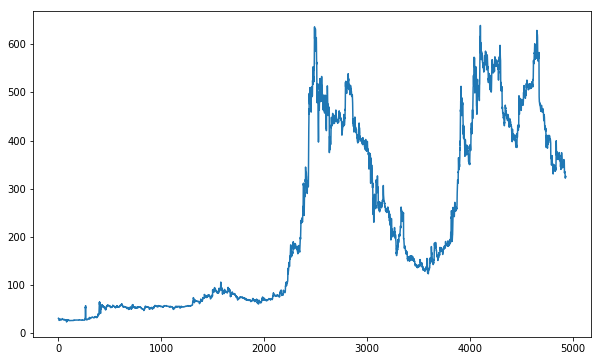

In [50]:
plt.figure(figsize=(10,6))
square_stock['Close_Price'].plot()



In [51]:
#Preaparing Labels
square_shift = square_stock.shift(-1)
label = square_shift['Close_Price']

In [52]:
label

0        30.5
1        30.2
2        30.1
3        28.5
4        27.7
5        26.3
6        26.2
7        26.2
8        26.3
9        26.5
10       26.7
11       27.3
12       28.0
13       28.6
14       29.1
15       29.3
16       28.7
17       27.9
18       27.8
19       27.8
20       27.7
21       27.2
22       27.0
23       26.9
24       27.0
25       27.2
26       27.5
27       27.3
28       27.5
29       27.6
        ...  
4899    347.7
4900    344.5
4901    349.5
4902    348.6
4903    349.6
4904    350.2
4905    351.8
4906    351.4
4907    351.6
4908    353.2
4909    360.4
4910    357.4
4911    353.0
4912    350.9
4913    356.7
4914    336.9
4915    332.7
4916    335.7
4917    335.9
4918    334.3
4919    331.9
4920    331.6
4921    330.2
4922    325.2
4923    321.8
4924    324.2
4925    324.3
4926    326.3
4927    324.9
4928      NaN
Name: Close_Price, Length: 4929, dtype: float64

In [54]:
# adjusting the shape of both for NaN
square_stock.drop(square_stock.index[len(square_stock)-1], axis=0, inplace=True)
label.drop(label.index[len(label)-1], axis=0, inplace=True)
square_stock = square_stock.drop('Date', axis=1)

In [55]:
trainX = square_stock.loc[100:]
testX = square_stock.loc[:100]
trainY = label.loc[100:]
testY = label.loc[:100]



trainX

,Open,Highest_Price,Lowest_Price,Close_Price
100,26.2,26.5,26.2,26.4
101,26.4,26.4,26.3,26.3
102,26.4,26.4,25.9,26.0
103,26.3,26.3,26.2,26.2
104,26.0,26.2,25.9,26.0
105,26.0,26.2,25.9,26.0
106,26.2,26.2,26.0,26.1
107,26.1,26.1,26.0,26.0
108,26.0,26.2,25.9,26.0
109,26.0,26.1,25.9,25.9


In [56]:
# conversion to numpy array x-Features y-labels
x, y = square_stock.values, label.values

In [57]:
y

array([ 30.5,  30.2,  30.1, ..., 324.2, 324.3, 326.3])

In [58]:
# scaling values for model
x_scale = MinMaxScaler()
y_scale = MinMaxScaler()

In [59]:
X = x_scale.fit_transform(x)
Y = y_scale.fit_transform(y.reshape(-1,1))

In [60]:
# splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
X_train = X_train.reshape((-1,1,4))
X_test = X_test.reshape((-1,1,4))

print('x_train shape:',X_train.shape)
print('Number of samples in x_train', X_train.shape[0])
print('Number of samples in x_test', X_test.shape[0])

print('Y_train shape:',y_train.shape)


x_train shape: (3301, 1, 4)
Number of samples in x_train 3301
Number of samples in x_test 1626
Y_train shape: (3301, 1)


In [61]:

model_name = 'stock_price_Square'

In [62]:
model = Sequential()
model.add(GRU(units=512,return_sequences=True,input_shape=(1, 4)))
model.add(Dropout(0.2))
model.add(GRU(units=256))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])

Train on 2970 samples, validate on 331 samples
Epoch 1/100
2970/2970 [==============================] - 3s 1ms/step - loss: 0.0596 - mean_squared_error: 0.0596 - mean_absolute_error: 0.1973 - mean_absolute_percentage_error: 161672.0440 - cosine_proximity: -0.9997 - val_loss: 0.0017 - val_mean_squared_error: 0.0017 - val_mean_absolute_error: 0.0361 - val_mean_absolute_percentage_error: 122.8731 - val_cosine_proximity: -1.0000
Epoch 2/100
2970/2970 [==============================] - 1s 429us/step - loss: 0.0028 - mean_squared_error: 0.0028 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 18739.2858 - cosine_proximity: -0.9997 - val_loss: 0.0016 - val_mean_squared_error: 0.0016 - val_mean_absolute_error: 0.0318 - val_mean_absolute_percentage_error: 75.6406 - val_cosine_proximity: -1.0000
Epoch 3/100
2970/2970 [==============================] - 1s 449us/step - loss: 0.0014 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 18556.0942

Epoch 22/100
2970/2970 [==============================] - 1s 450us/step - loss: 9.1804e-04 - mean_squared_error: 9.1804e-04 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 16939.8721 - cosine_proximity: -0.9997 - val_loss: 9.2246e-04 - val_mean_squared_error: 9.2246e-04 - val_mean_absolute_error: 0.0248 - val_mean_absolute_percentage_error: 70.1754 - val_cosine_proximity: -1.0000
Epoch 23/100
2970/2970 [==============================] - 1s 445us/step - loss: 8.9786e-04 - mean_squared_error: 8.9786e-04 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 17711.5360 - cosine_proximity: -0.9997 - val_loss: 8.5016e-04 - val_mean_squared_error: 8.5016e-04 - val_mean_absolute_error: 0.0227 - val_mean_absolute_percentage_error: 68.1644 - val_cosine_proximity: -1.0000
Epoch 24/100
2970/2970 [==============================] - 1s 477us/step - loss: 8.9757e-04 - mean_squared_error: 8.9757e-04 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 19445.0028 - c

2970/2970 [==============================] - 1s 440us/step - loss: 8.3142e-04 - mean_squared_error: 8.3142e-04 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 19708.1639 - cosine_proximity: -0.9997 - val_loss: 8.1490e-04 - val_mean_squared_error: 8.1490e-04 - val_mean_absolute_error: 0.0232 - val_mean_absolute_percentage_error: 69.9289 - val_cosine_proximity: -1.0000
Epoch 43/100
2970/2970 [==============================] - 1s 420us/step - loss: 8.5572e-04 - mean_squared_error: 8.5572e-04 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 13696.7607 - cosine_proximity: -0.9997 - val_loss: 7.6473e-04 - val_mean_squared_error: 7.6473e-04 - val_mean_absolute_error: 0.0223 - val_mean_absolute_percentage_error: 68.3859 - val_cosine_proximity: -1.0000
Epoch 44/100
2970/2970 [==============================] - 1s 422us/step - loss: 8.4636e-04 - mean_squared_error: 8.4636e-04 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 15085.1648 - cosine_proximi

Epoch 63/100
2970/2970 [==============================] - 1s 422us/step - loss: 3.1024e-04 - mean_squared_error: 3.1024e-04 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 9603.3913 - cosine_proximity: -0.9997 - val_loss: 2.5252e-04 - val_mean_squared_error: 2.5252e-04 - val_mean_absolute_error: 0.0118 - val_mean_absolute_percentage_error: 34.9025 - val_cosine_proximity: -1.0000
Epoch 64/100
2970/2970 [==============================] - 1s 441us/step - loss: 3.1704e-04 - mean_squared_error: 3.1704e-04 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 10656.0393 - cosine_proximity: -0.9997 - val_loss: 1.9559e-04 - val_mean_squared_error: 1.9559e-04 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 34.4075 - val_cosine_proximity: -1.0000
Epoch 65/100
2970/2970 [==============================] - 1s 437us/step - loss: 3.0925e-04 - mean_squared_error: 3.0925e-04 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 9021.0717 - cos

Epoch 84/100
2970/2970 [==============================] - 1s 448us/step - loss: 2.9081e-04 - mean_squared_error: 2.9081e-04 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 9149.1045 - cosine_proximity: -0.9997 - val_loss: 2.3158e-04 - val_mean_squared_error: 2.3158e-04 - val_mean_absolute_error: 0.0113 - val_mean_absolute_percentage_error: 33.3339 - val_cosine_proximity: -1.0000
Epoch 85/100
2970/2970 [==============================] - 1s 454us/step - loss: 3.0994e-04 - mean_squared_error: 3.0994e-04 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 15458.1562 - cosine_proximity: -0.9997 - val_loss: 1.9179e-04 - val_mean_squared_error: 1.9179e-04 - val_mean_absolute_error: 0.0093 - val_mean_absolute_percentage_error: 30.6450 - val_cosine_proximity: -1.0000
Epoch 86/100
2970/2970 [==============================] - 1s 426us/step - loss: 2.7848e-04 - mean_squared_error: 2.7848e-04 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 11705.2907 - co

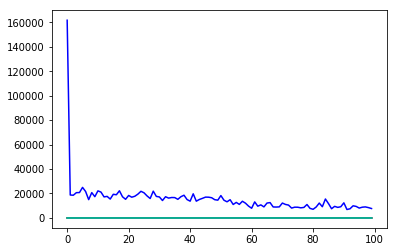

MODEL-SAVED


In [63]:
history = model.fit(X_train,y_train,batch_size=100, epochs=100, validation_split=0.1, verbose=1)
# plot metrics
plt.plot(history.history['mean_squared_error'],'r')
plt.plot(history.history['mean_absolute_error'],'g')
plt.plot(history.history['mean_absolute_percentage_error'],'b')
plt.plot(history.history['cosine_proximity'],'c')
plt.show()

model.save("{}.h5".format(model_name))
print('MODEL-SAVED')

In [64]:
# #Load saved Model
# model = load_model("{}.h5".format(model_name))
# print("MODEL-LOADED")

In [65]:
score = model.evaluate(X_test, y_test)
print('Score: {}'.format(score))

1626/1626 [==============================] - 0s 141us/step
Score: [0.00019945367377238214, 0.00019945367377238214, 0.009311007966973612, 24.52312790658348, -1.0]


In [66]:
yhata = model.predict(X_test)
yhata_inverse = y_scale.inverse_transform(yhata)
y_test_inverse = y_scale.inverse_transform(y_test)

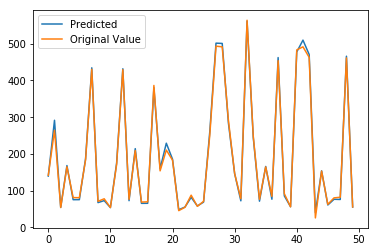

In [73]:
plt.plot(yhata_inverse[-50:], label='Predicted')
plt.plot(y_test_inverse[-50:], label='Original Value')
plt.legend()
plt.show()

In [68]:
X_train

array([[[0.2063745 , 0.20548372, 0.21374686, 0.20756248]],

       [[0.19840637, 0.19925222, 0.20737636, 0.20480364]],

       [[0.04749004, 0.0461131 , 0.04945516, 0.04803635]],

       ...,

       [[0.05227092, 0.05063094, 0.05498743, 0.0529049 ]],

       [[0.012749  , 0.01168406, 0.01324392, 0.01233366]],

       [[0.05115538, 0.04938464, 0.05364627, 0.05128205]]])

In [69]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(y_test_inverse, yhata_inverse)
print('Test MSE: %.3f' % error)

Test MSE: 75.733
